**GrayScale**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

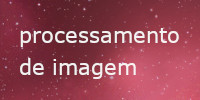

In [ ]:
img = cv2.imread('/content/img-process.jpg')
cv2_imshow(img)


In [ ]:
img.shape

(100, 200, 3)

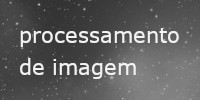

In [ ]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey)

In [ ]:
grey.shape

(100, 200)

**Simple Thesholding**


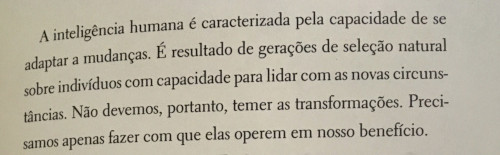

In [ ]:
img = cv2.imread('/content/page-book.jpg')
cv2_imshow(img)

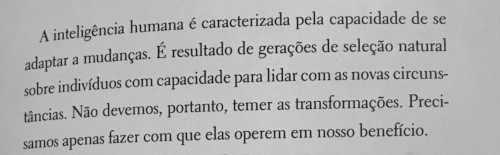

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

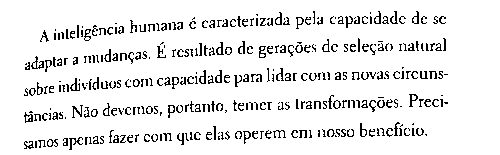

127.0


In [ ]:
value,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(value)

**OTSU Threshold Method**

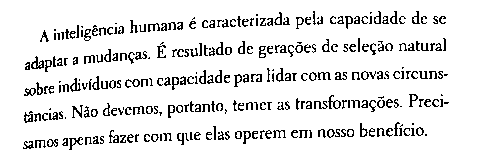

138.0


In [ ]:
value,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

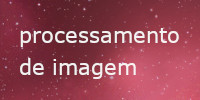

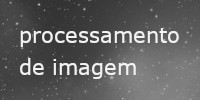

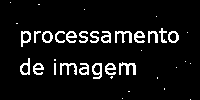

154.0


In [ ]:
img = cv2.imread('/content/img-process.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
value,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

**Adaptive Thresholding**

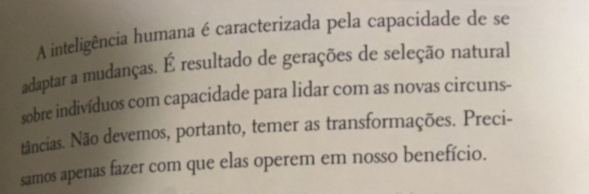

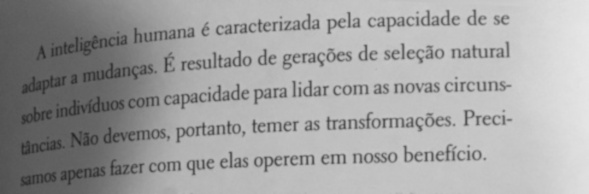

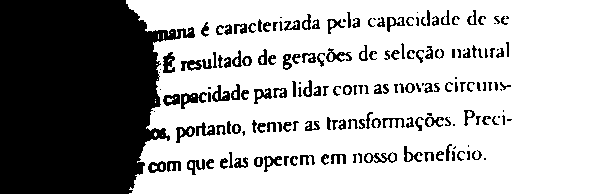

147.0


In [ ]:
img = cv2.imread('/content/book02.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
value,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

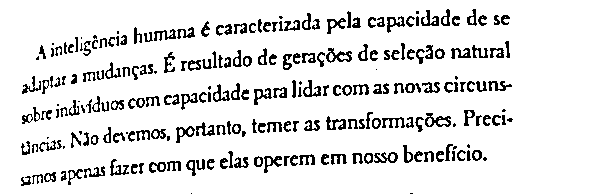

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
cv2_imshow(adaptive_average)

**Guassian Adaptive Thresholding**

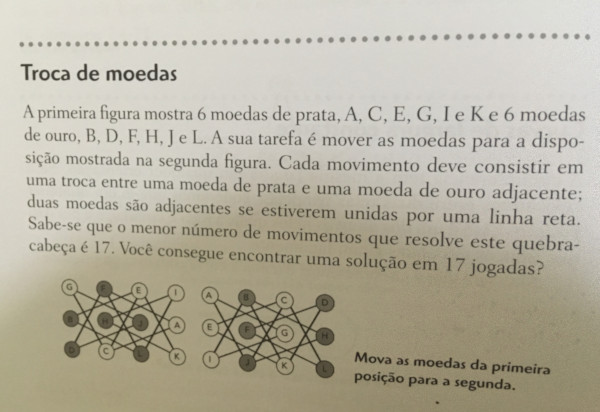

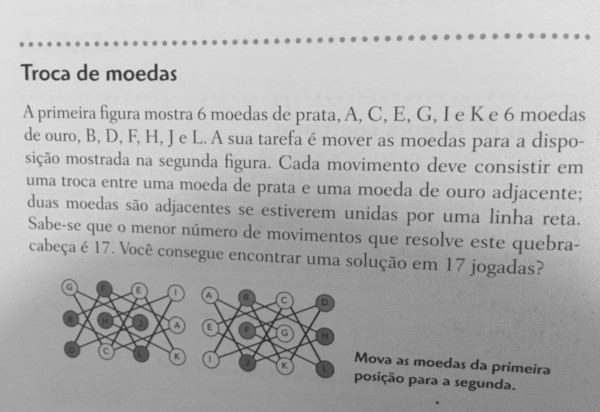

In [ ]:
img = cv2.imread('/content/book_adaptative.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


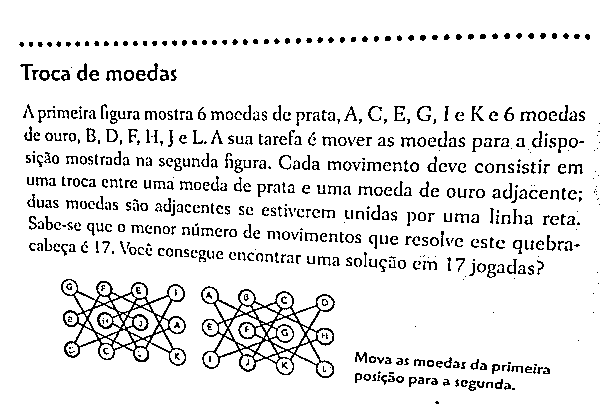

In [ ]:
adaptive_gaussian = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,9)
cv2_imshow(adaptive_gaussian)

**Color Inversion**

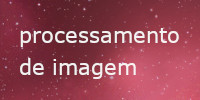

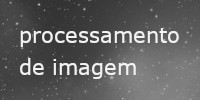

In [ ]:
img = cv2.imread('/content/img-process.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


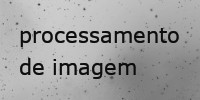

In [ ]:
inversion = 255-gray
cv2_imshow(inversion)


**Resizing**

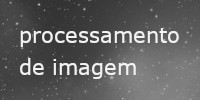

In [ ]:
cv2_imshow(gray)

In [ ]:
gray.shape

(100, 200)

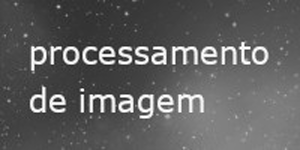

In [ ]:
increase = cv2.resize(gray,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_CUBIC)
cv2_imshow(increase)

In [ ]:
increase.shape

(150, 300)

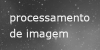

In [ ]:
decrease = cv2.resize(gray,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
cv2_imshow(decrease)

In [ ]:
decrease.shape

(50, 100)

**Morphological Operations**

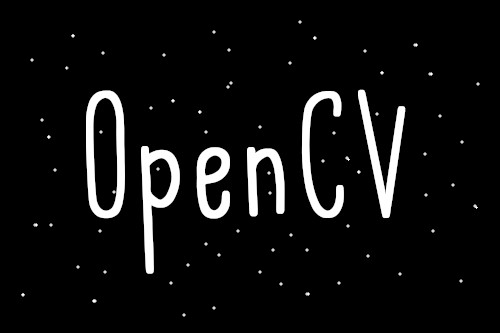

In [ ]:
img = cv2.imread('/content/text-opencv.jpg')
cv2_imshow(img)


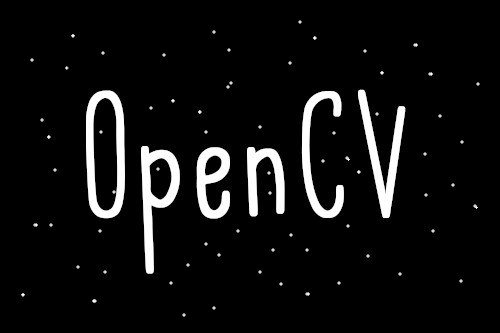

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
np.ones((3,3),np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

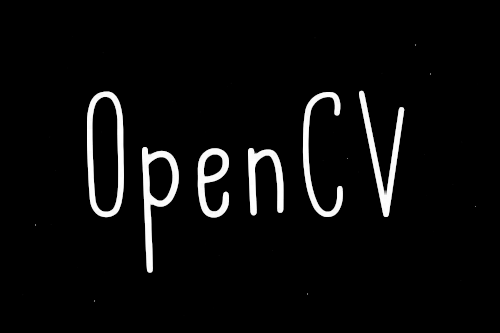

In [ ]:
erosion = cv2.erode(gray,np.ones((3,3),np.uint8))
cv2_imshow(erosion)

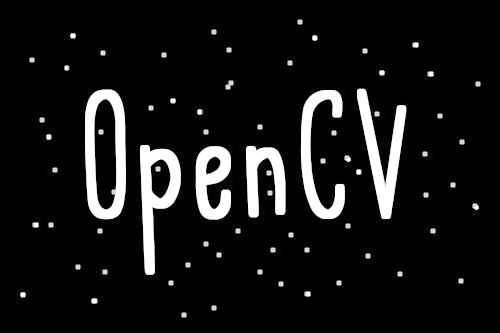

In [ ]:
dilation = cv2.dilate(gray,np.ones((3,3),np.uint8))
cv2_imshow(dilation)

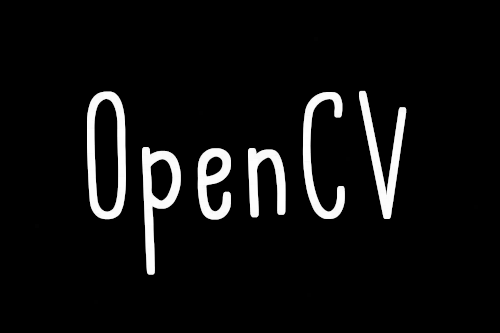

In [ ]:

erosion = cv2.erode(gray,np.ones((4,4),np.uint8))
opening = cv2.dilate(erosion,np.ones((4,4),np.uint8))
cv2_imshow(opening)


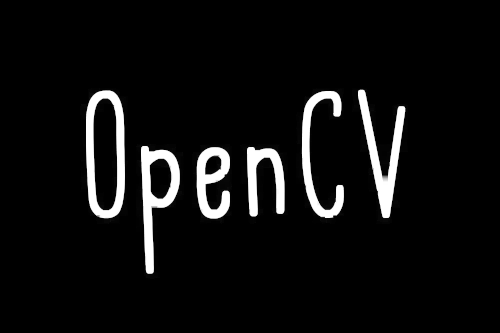

In [ ]:
img = cv2.imread('/content/text-opencv2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dilation = cv2.dilate(gray,np.ones((5,5),np.uint8))
closing = cv2.erode(dilation,np.ones((5,5),np.uint8))
cv2_imshow(closing)

**Noise Removal**

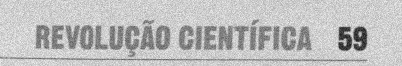

In [ ]:
img = cv2.imread('/content/test_noise.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

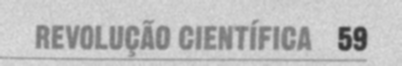

In [ ]:
gaussian_blur = cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(gaussian_blur)

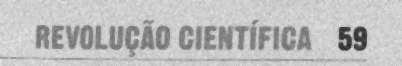

In [ ]:
median_blur = cv2.medianBlur(gray,3)
cv2_imshow(median_blur)

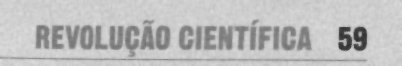

In [ ]:
bilateral_filter = cv2.bilateralFilter(gray,5,55,55)
cv2_imshow(bilateral_filter)

**Text Detection**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pytesseract

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
config_tesseract = '--tessdata-dir tessdata'


--2025-08-11 07:06:34--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-08-11 07:06:35--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-08-11 07:06:35--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [ ]:
text = pytesseract.image_to_string(gaussian_blur,lang='por',config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59



In [ ]:
text = pytesseract.image_to_string(median_blur,lang='por',config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59



**Exercise**

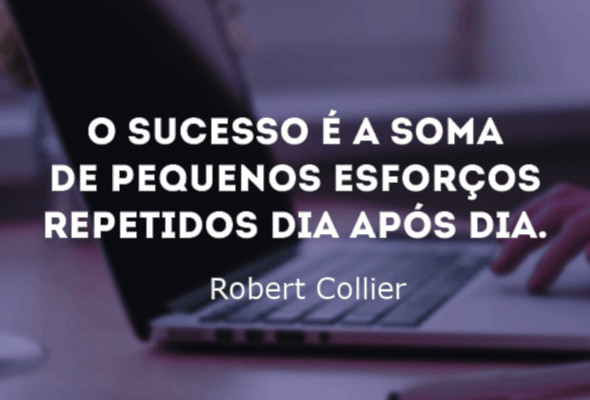

O SUCESSO É AÀA SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier



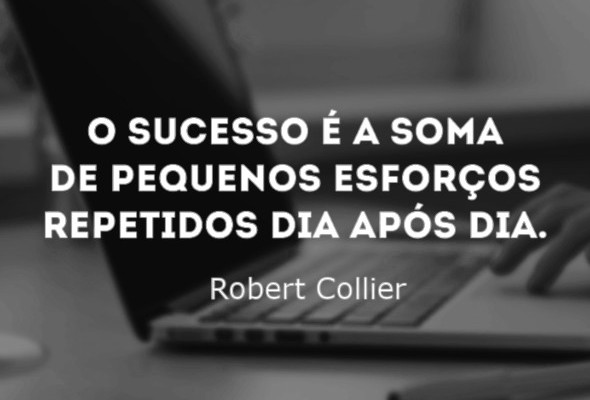

In [ ]:
img = cv2.imread('/content/sentence.jpg')
cv2_imshow(img)
text = pytesseract.image_to_string(gaussian_blur,lang='por',config=config_tesseract)
print(text)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

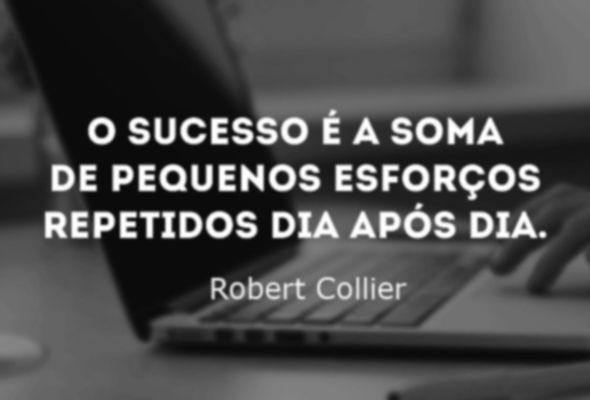

In [ ]:
gaussian_blur = cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(gaussian_blur)

In [ ]:
text = pytesseract.image_to_string(gaussian_blur,lang='por',config=config_tesseract)
print(text)

O SUCESSO É AÀA SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier



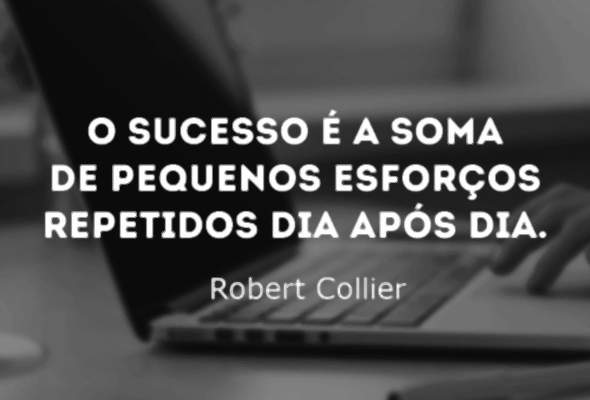

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier



In [ ]:
median_blur = cv2.medianBlur(gray,3)
cv2_imshow(median_blur)
text = pytesseract.image_to_string(median_blur,lang='por',config=config_tesseract)
print(text)